In [1]:
from pylab import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

DATA_PATH = "D:/data/311_Service_Requests_2015.csv" # Make this the /path/to/the/data


In [2]:
# data_2015 = pd.read_csv(DATA_PATH, usecols=col, dtype=my_type)
data_2015 = pd.read_csv(DATA_PATH)

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (8,17,18,40,41,42,43,44,45,46,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
data_2015

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,30264625,03/26/2015 06:50:06 PM,07/22/2015 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,11104,43-07 49 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.744356,-73.915600,"(40.744356415099226, -73.9155997390839)"
1,30279915,03/28/2015 04:30:52 PM,08/08/2016 12:00:00 AM,DOB,Department of Buildings,Building/Use,Zoning - Non-Conforming/Illegal Vehicle Storage,NaN,11361,40-20 215 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.764384,-73.768646,"(40.764383824168, -73.76864600551563)"
2,30314570,04/01/2015 04:48:00 PM,08/12/2016 04:07:00 PM,DOT,Department of Transportation,Street Light Condition,New Con Ed Service Request,NaN,NaN,GLENWOOD HOUSES PLGD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30542111,05/04/2015 04:46:00 PM,09/29/2016 06:54:00 PM,DOT,Department of Transportation,Street Light Condition,New Con Ed Service Request,NaN,11234,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.616437,-73.929517,"(40.61643737486982, -73.92951728340122)"
4,30422344,04/17/2015 01:50:07 PM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,NaN,11236,8720 DITMAS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.646814,-73.916718,"(40.64681363585129, -73.91671771596958)"
5,30543106,05/04/2015 04:41:00 PM,09/29/2016 06:53:00 PM,DOT,Department of Transportation,Street Light Condition,New Con Ed Service Request,NaN,11234,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.618771,-73.929789,"(40.61877061527915, -73.92978857655976)"
6,30542875,05/04/2015 02:49:25 PM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,NaN,NaN,ELI AND NEREID AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,30554653,05/06/2015 12:39:31 AM,08/13/2015 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,Residential,11373,87-33 JUSTICE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.737189,-73.875605,"(40.737189292026486, -73.87560534671164)"
8,30554646,05/05/2015 10:49:36 AM,08/22/2016 12:00:00 AM,DOB,Department of Buildings,Building/Use,Illegal. Commercial Use In Resident Zone,NaN,10033,717 WEST 177 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.847641,-73.938428,"(40.84764130930932, -73.93842772646954)"
9,30556593,05/06/2015 01:04:44 PM,08/07/2015 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,Residential,10023,2 RIVERSIDE DRIVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.780425,-73.985622,"(40.78042491391933, -73.98562176267698)"


In [4]:
data_2015.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                       object
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [12]:
col = ['Created Date', 'Incident Zip', 'Borough', 'Complaint Type', 'Agency', 'Agency Name']
my_type = {'Created Date': str, 'Incident Zip': float64, 'Complaint Type' : str}

In [14]:
data_required = data_2015[col]

In [15]:
data_required.head()

,Created Date,Incident Zip,Borough,Complaint Type,Agency,Agency Name
0,03/26/2015 06:50:06 PM,11104,QUEENS,Graffiti,DSNY,Department of Sanitation
1,03/28/2015 04:30:52 PM,11361,QUEENS,Building/Use,DOB,Department of Buildings
2,04/01/2015 04:48:00 PM,NaN,BROOKLYN,Street Light Condition,DOT,Department of Transportation
3,05/04/2015 04:46:00 PM,11234,BROOKLYN,Street Light Condition,DOT,Department of Transportation
4,04/17/2015 01:50:07 PM,11236,BROOKLYN,Graffiti,DSNY,Department of Sanitation


In [31]:
data_agency = data_required[['Agency']]

In [32]:
len(data_agency)

2282098

In [38]:
agency_size = data_agency.groupby('Agency')

In [40]:
agency_size

In [48]:
agency_size_count = agency_size.size()
agency_size_count.values

array([  1291,      4,      3,      1,      1,     17,      1,  20335,
            2, 185063,   9461,   6517,  88388,      5,   1636,  77800,
        58792,    430,     43, 318466,  89892, 154869,      1,   1503,
         6896,      3, 627973,  27325,      3,      1,      1,      7,
            8,      5,     10,    164,      7,      2,      2,      2,
       578559,    118,      4,      1,      9,      1,  26476], dtype=int64)

IndexError: invalid index to scalar variable.

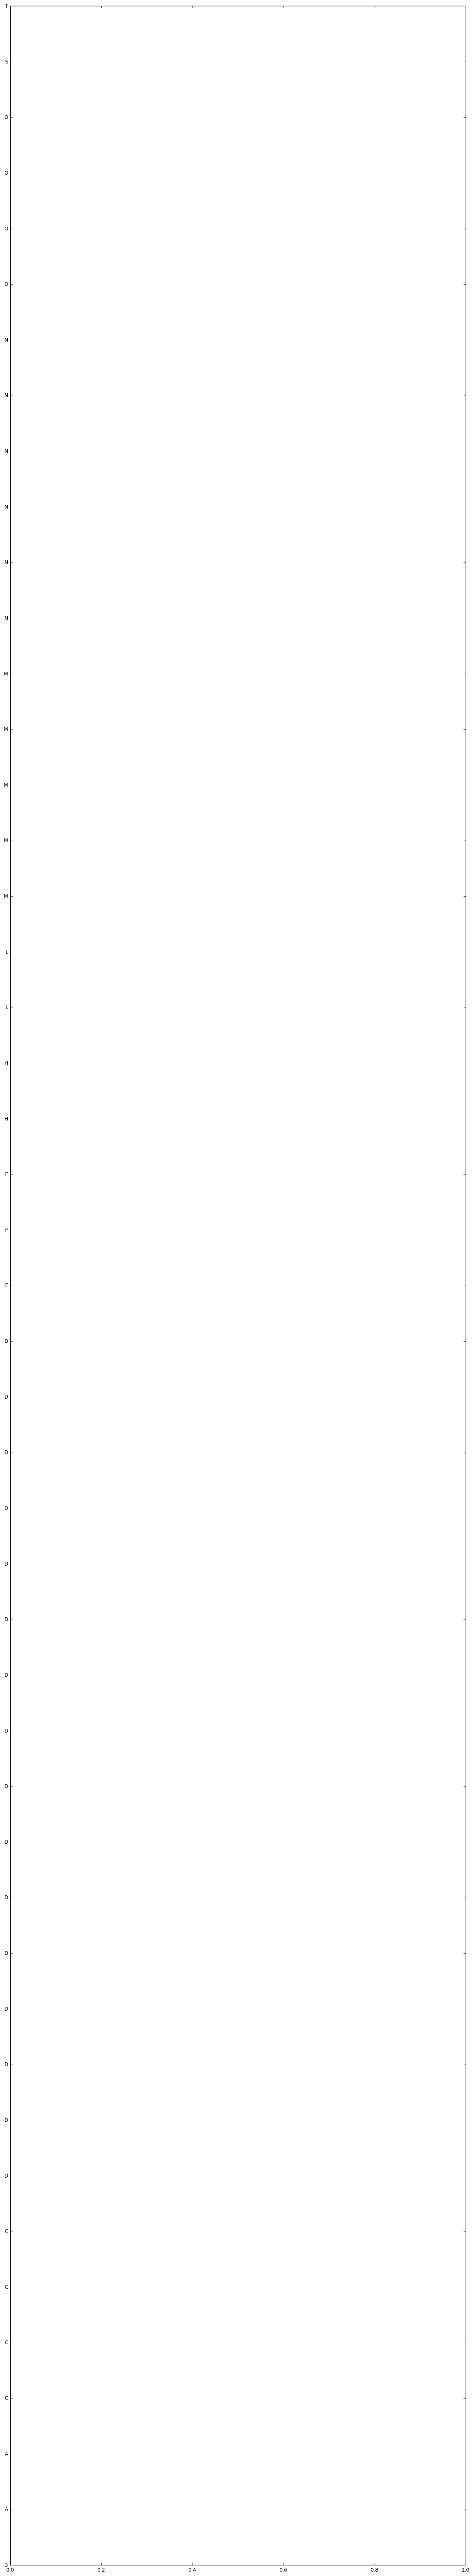

In [49]:
plt.figure(num=None, figsize=(16, 90), dpi=600, facecolor='w', edgecolor='k')
plt.yticks(range(len(agency_size_count)), [record[0] for record in agency_size_count.keys()])
plt.barh(range(len(agency_size_count.values)), [record[1] for record in agency_size_count.values], align='center')
plt.subplots_adjust(left=0.15)

plt.title('GDPs in 2000')
plt.gca().xaxis.grid(True)
plt.show()

In [24]:
data_agency = data_agency.drop_duplicates()

In [29]:
len(data_agency)

2282098

In [30]:
data_agency.count

<bound method DataFrame.count of         Agency
0         DSNY
1          DOB
2          DOT
3          DOT
4         DSNY
5          DOT
6         DSNY
7         DSNY
8          DOB
9         DSNY
10         DOB
11        DSNY
12         DOB
13         DOB
14        DSNY
15         DOB
16        DSNY
17        DSNY
18         DOB
19         DOB
20        DSNY
21         DPR
22         DOB
23         DPR
24         DPR
25         DPR
26         DOB
27        DSNY
28         DPR
29         DOB
...        ...
2282068    DOT
2282069    DOT
2282070    DOT
2282071    DOT
2282072    DOT
2282073    DOT
2282074    DOT
2282075    DOT
2282076    DOT
2282077    DOT
2282078    DOT
2282079    DOT
2282080    DOT
2282081    DOT
2282082    DOT
2282083    DOT
2282084    DOT
2282085    DOT
2282086    DOT
2282087    DOT
2282088    DOT
2282089    DOT
2282090    DOT
2282091    DOT
2282092    DOT
2282093    DOT
2282094    DOT
2282095    DEP
2282096    DEP
2282097    DOB

[2282098 rows x 1 columns]>

In [5]:
data_2015.dtypes

Created Date      object
Agency            object
Agency Name       object
Complaint Type    object
Incident Zip      object
dtype: object

In [6]:
sample_col = ['Created Date', 'Incident Zip', 'Complaint Type']
data_clean = data_2015[sample_col]

In [7]:
data_clean.head()

,Created Date,Incident Zip,Complaint Type
0,03/26/2015 06:50:06 PM,11104,Graffiti
1,03/28/2015 04:30:52 PM,11361,Building/Use
2,04/01/2015 04:48:00 PM,NaN,Street Light Condition
3,05/04/2015 04:46:00 PM,11234,Street Light Condition
4,04/17/2015 01:50:07 PM,11236,Graffiti


In [8]:
len(data_clean)

2282098

In [9]:
data_clean['Incident Zip'] = data_clean['Incident Zip'].convert_objects(convert_numeric=True)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [10]:
data_clean.dtypes

Created Date       object
Incident Zip      float64
Complaint Type     object
dtype: object

In [11]:
data_clean = data_clean.dropna(axis=0) #drop NaN

In [12]:
len(data_clean)

2114618

In [13]:
complaint_type = data_clean['Complaint Type']

In [14]:
complaint_type

0                               Graffiti
1                           Building/Use
3                 Street Light Condition
4                               Graffiti
5                 Street Light Condition
7                               Graffiti
8                           Building/Use
9                               Graffiti
10                          Building/Use
11                              Graffiti
12                          Building/Use
13         General Construction/Plumbing
14                              Graffiti
15                          Building/Use
18         General Construction/Plumbing
19                          Building/Use
20                              Graffiti
21               Overgrown Tree/Branches
22                          Building/Use
23               Overgrown Tree/Branches
24               Overgrown Tree/Branches
25               Overgrown Tree/Branches
26                          Building/Use
27                              Graffiti
28              

In [15]:
# complaint_type = complaint_type.drop_duplicates(subset='Complaint Type', keep='last')
# complaint_type = complaint_type.groupby('Complaint Type')
complaint_type = complaint_type.drop_duplicates()

In [16]:
complaint_type

0                                         Graffiti
1                                     Building/Use
3                           Street Light Condition
13                   General Construction/Plumbing
21                         Overgrown Tree/Branches
38                   Root/Sewer/Sidewalk Condition
69                                New Tree Request
81                                  Taxi Complaint
85                           Street Sign - Damaged
96                                    Damaged Tree
100                            Special Enforcement
103                       Traffic Signal Condition
113                          Street Sign - Missing
119                                   Water System
122                                       Plumbing
129                               Street Condition
131                                       Elevator
140        Special Projects Inspection Team (SPIT)
216                                          Noise
221                            

In [17]:
len(complaint_type)

200

In [18]:
complaint_array = complaint_type.values

In [19]:

complaint_dic = {}
count = 0
for i in complaint_array:
    complaint_dic[i] = count
    count+=1
complaint_dic

{'AGENCY': 188,
 'APPLIANCE': 100,
 'Adopt-A-Basket': 154,
 'Advocate - Other': 194,
 'Advocate - RPIE': 199,
 'Advocate-Commercial Exemptions': 192,
 'Advocate-Personal Exemptions': 190,
 'Advocate-Prop Class Incorrect': 191,
 'Advocate-SCRIE/DRIE': 189,
 'Air Quality': 22,
 "Alzheimer's Care": 78,
 'Animal Abuse': 124,
 'Animal Facility - No Permit': 152,
 'Animal in a Park': 50,
 'Asbestos': 40,
 'BEST/Site Safety': 44,
 'Beach/Pool/Sauna Complaint': 147,
 'Bereavement Support Group': 166,
 'Bike Rack Condition': 85,
 'Bike/Roller/Skate Chronic': 138,
 'Blocked Driveway': 74,
 'Boilers': 90,
 'Bottled Water': 173,
 'Bridge Condition': 150,
 'Broken Muni Meter': 87,
 'Broken Parking Meter': 134,
 'Building Condition': 183,
 'Building/Use': 1,
 'Bus Stop Shelter Placement': 132,
 'Calorie Labeling': 170,
 'Case Management Agency Complaint': 159,
 'City Vehicle Placard Complaint': 86,
 'Collection Truck Noise': 137,
 'Construction': 73,
 'Consumer Complaint': 84,
 'Cranes and Derricks'

In [20]:
data_feature = data_clean[['Created Date', 'Incident Zip']]
data_target = data_clean[['Complaint Type']]

In [21]:
data_feature.head()
data_feature.dtypes

Created Date     object
Incident Zip    float64
dtype: object

In [22]:
data_feature.values

array([['03/26/2015 06:50:06 PM', 11104.0],
       ['03/28/2015 04:30:52 PM', 11361.0],
       ['05/04/2015 04:46:00 PM', 11234.0],
       ..., 
       ['09/02/2015 12:58:00 PM', 11001.0],
       ['09/02/2015 08:59:00 AM', 11691.0],
       ['07/16/2015 09:42:04 AM', 11222.0]], dtype=object)

In [23]:
data_feature_zip = data_clean[['Incident Zip']]

In [24]:
data_feature_zip.values

array([[ 11104.],
       [ 11361.],
       [ 11234.],
       ..., 
       [ 11001.],
       [ 11691.],
       [ 11222.]])

In [25]:
data_feature_zip.shape

(2114618, 1)

In [26]:
data_target.head()
data_target.dtypes

Complaint Type    object
dtype: object

In [27]:
data_target_array = data_target.values
data_target_array

array([['Graffiti'],
       ['Building/Use'],
       ['Street Light Condition'],
       ..., 
       ['Sewer'],
       ['Sewer'],
       ['General Construction/Plumbing']], dtype=object)

In [28]:
data_target_num = data_target.replace(complaint_dic)

In [29]:
data_target_num.head()

,Complaint Type
0,0
1,1
3,2
4,0
5,2


In [30]:
data_target_num.dtypes

Complaint Type    int64
dtype: object

In [76]:
# pd.to_numeric(data_sample_zip['Incident Zip'])
# mydf['CigarNum'] = mydf['CigarNum'].convert_objects(convert_numeric=True)
# data_sample_zip['Incident Zip'] = data_sample_zip['Incident Zip'].convert_objects(convert_numeric=True)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [33]:
data_feature_zip.shape

(2114618, 1)

In [34]:
data_target_num.shape

(2114618, 1)

- K-nearest neighbors (KNN) classification

In [35]:
from sklearn.neighbors import KNeighborsClassifier


knn_1 = KNeighborsClassifier(n_neighbors=1)

In [40]:
data_feature_zip.as_matrix()

array([[ 11104.],
       [ 11361.],
       [ 11234.],
       ..., 
       [ 11001.],
       [ 11691.],
       [ 11222.]])

In [41]:
data_target_num.as_matrix()

array([[ 0],
       [ 1],
       [ 2],
       ..., 
       [21],
       [21],
       [ 3]], dtype=int64)

In [37]:
knn_1.fit(data_feature_zip, data_target_num.values)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [ ]:
from sklearn.cross_validation import cross_val_score




In [63]:
from sklearn.cross_validation import KFold
kf = KFold(25, n_folds=5, shuffle=False)

In [64]:
kf

sklearn.cross_validation.KFold(n=25, n_folds=5, shuffle=False, random_state=None)

我只是试试